<a href="https://colab.research.google.com/github/dafnep4/Dafne-Petrelli-s-coding/blob/main/Coursework_2_Delhi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd #importing neccesary libraries which I will be using throughout this analysis.
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import statsmodels.formula.api as sm
import statsmodels.api as sm2
import statsmodels.api as sm

In [51]:
df=pd.read_csv("delhi_aqi.csv") #importing file I will be using.

In [52]:
df["date"]=pd.to_datetime(df["date"],errors="coerce",utc=True) #converting data frame into date time.
df.head(5)

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3
0,2020-11-25 01:00:00+00:00,2616.88,2.18,70.60,13.59,38.62,364.61,411.73,28.63
1,2020-11-25 02:00:00+00:00,3631.59,23.25,89.11,0.33,54.36,420.96,486.21,41.04
2,2020-11-25 03:00:00+00:00,4539.49,52.75,100.08,1.11,68.67,463.68,541.95,49.14
3,2020-11-25 04:00:00+00:00,4539.49,50.96,111.04,6.44,78.20,454.81,534.00,48.13
4,2020-11-25 05:00:00+00:00,4379.27,42.92,117.90,17.17,87.74,448.14,529.19,46.61


In [53]:
df.info() #information of the data set, to understand how many entries and how many feautures it has.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18776 entries, 0 to 18775
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    18776 non-null  datetime64[ns, UTC]
 1   co      18776 non-null  float64            
 2   no      18776 non-null  float64            
 3   no2     18776 non-null  float64            
 4   o3      18776 non-null  float64            
 5   so2     18776 non-null  float64            
 6   pm2_5   18776 non-null  float64            
 7   pm10    18776 non-null  float64            
 8   nh3     18776 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(8)
memory usage: 1.3 MB


In [54]:
df.describe() #printed main statistics of the data to learn more about it.

,co,no,no2,o3,so2,pm2_5,pm10,nh3
count,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000,18776.000000
mean,2929.228628,33.660702,66.221299,60.346239,66.693633,238.130309,300.092966,25.109815
std,2854.523506,62.127118,48.527492,80.464932,49.439191,226.533625,267.165827,26.402108
min,260.350000,0.000000,4.280000,0.000000,5.250000,11.830000,15.070000,0.000000
25%,1068.120000,0.680000,33.930000,0.340000,34.810000,84.440000,118.797500,9.630000
50%,1842.500000,5.250000,54.150000,27.180000,52.930000,157.445000,209.705000,17.480000
75%,3685.000000,35.760000,83.630000,92.980000,82.020000,313.000000,387.965000,30.400000
max,21148.680000,500.680000,460.620000,801.090000,579.830000,1708.090000,1969.930000,287.770000


In [55]:
print(df.isna().sum()) #summed all possible missing values, but realised there were none.

date     0
co       0
no       0
no2      0
o3       0
so2      0
pm2_5    0
pm10     0
nh3      0
dtype: int64


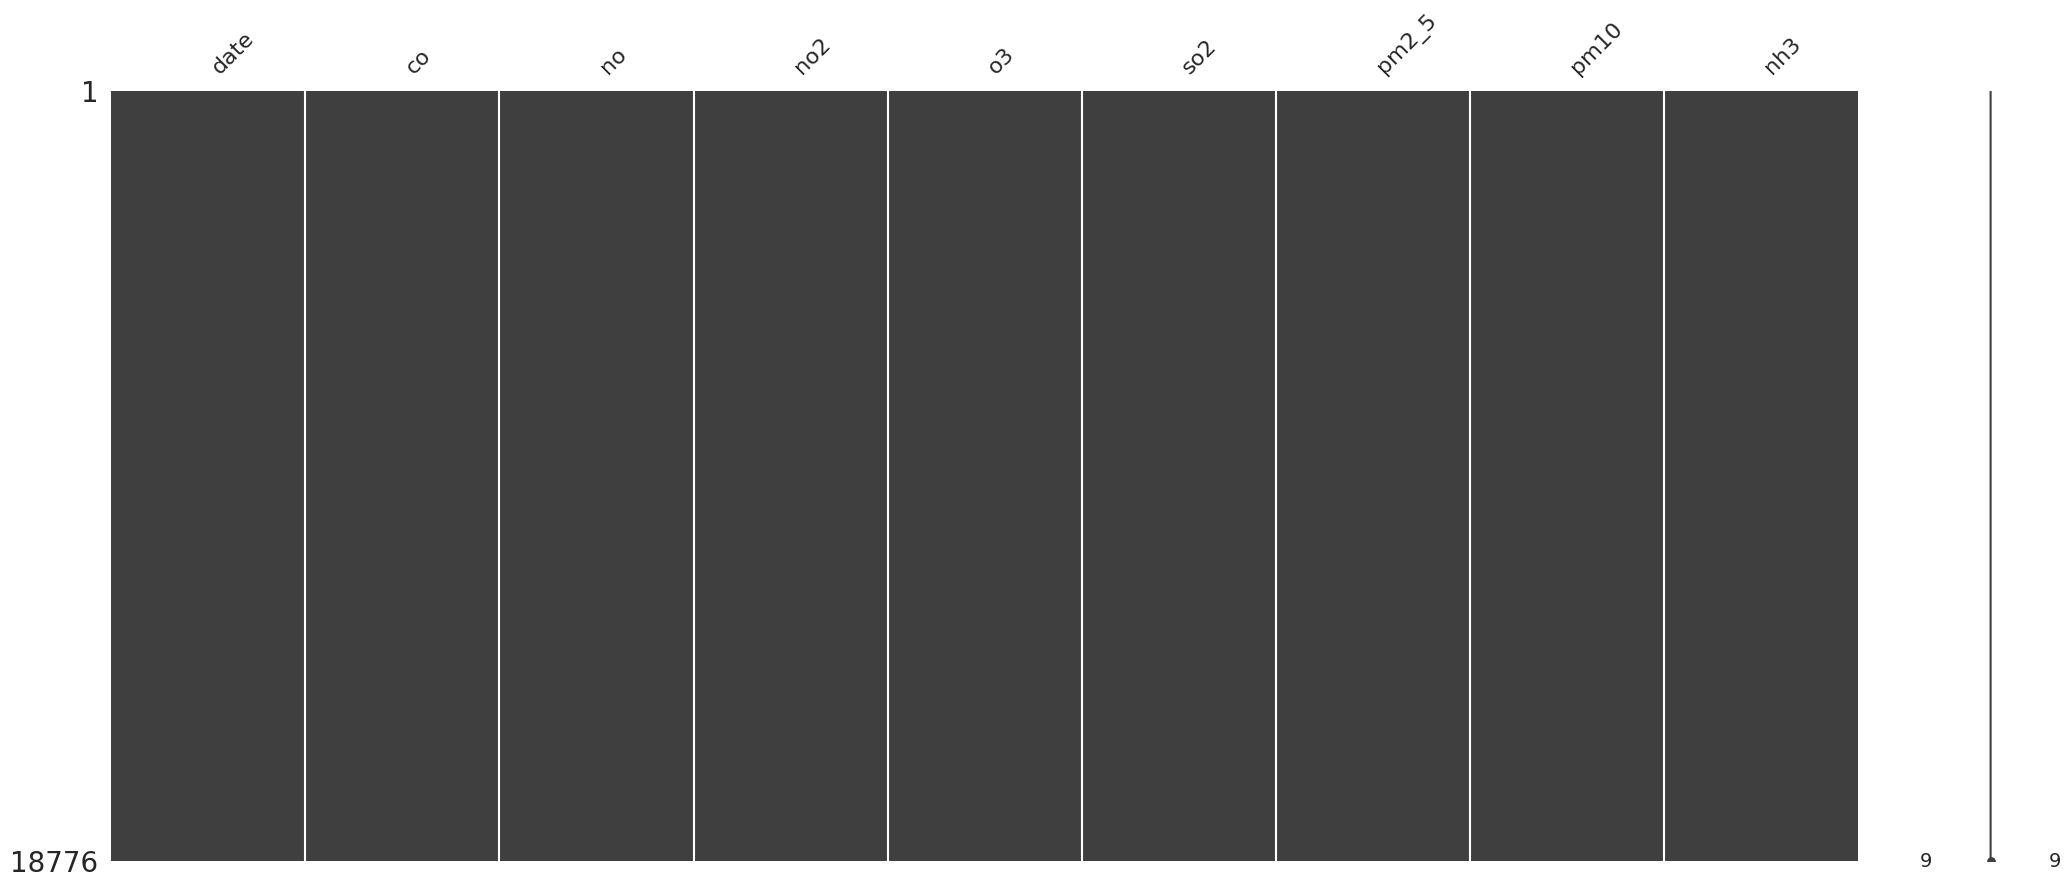

In [56]:
msno.matrix(df) #plotted a matrix just to show that there no missing values, if there were then a line would showcase for the pollutant that it contained it, to visualise where the missing value would lie in.
plt.show()

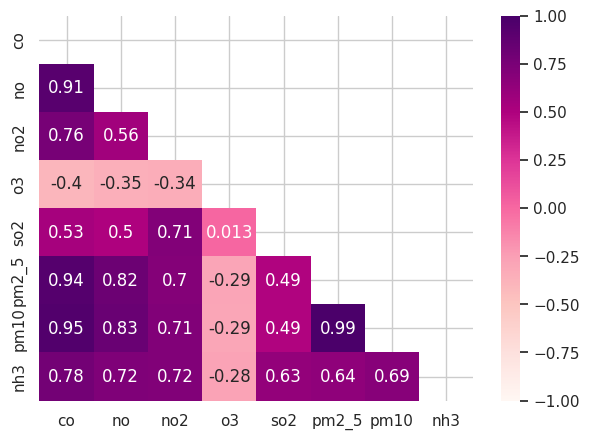

In [57]:
plt.figure(figsize=(7,5)) #plotted heatmap to see correlation between each feauture
mask=np.triu(np.ones_like(df.corr(numeric_only=True)))
sns.heatmap(df.corr(numeric_only=True),cmap="RdPu",mask=mask,annot=True,vmin=-1,vmax=1)
plt.show()

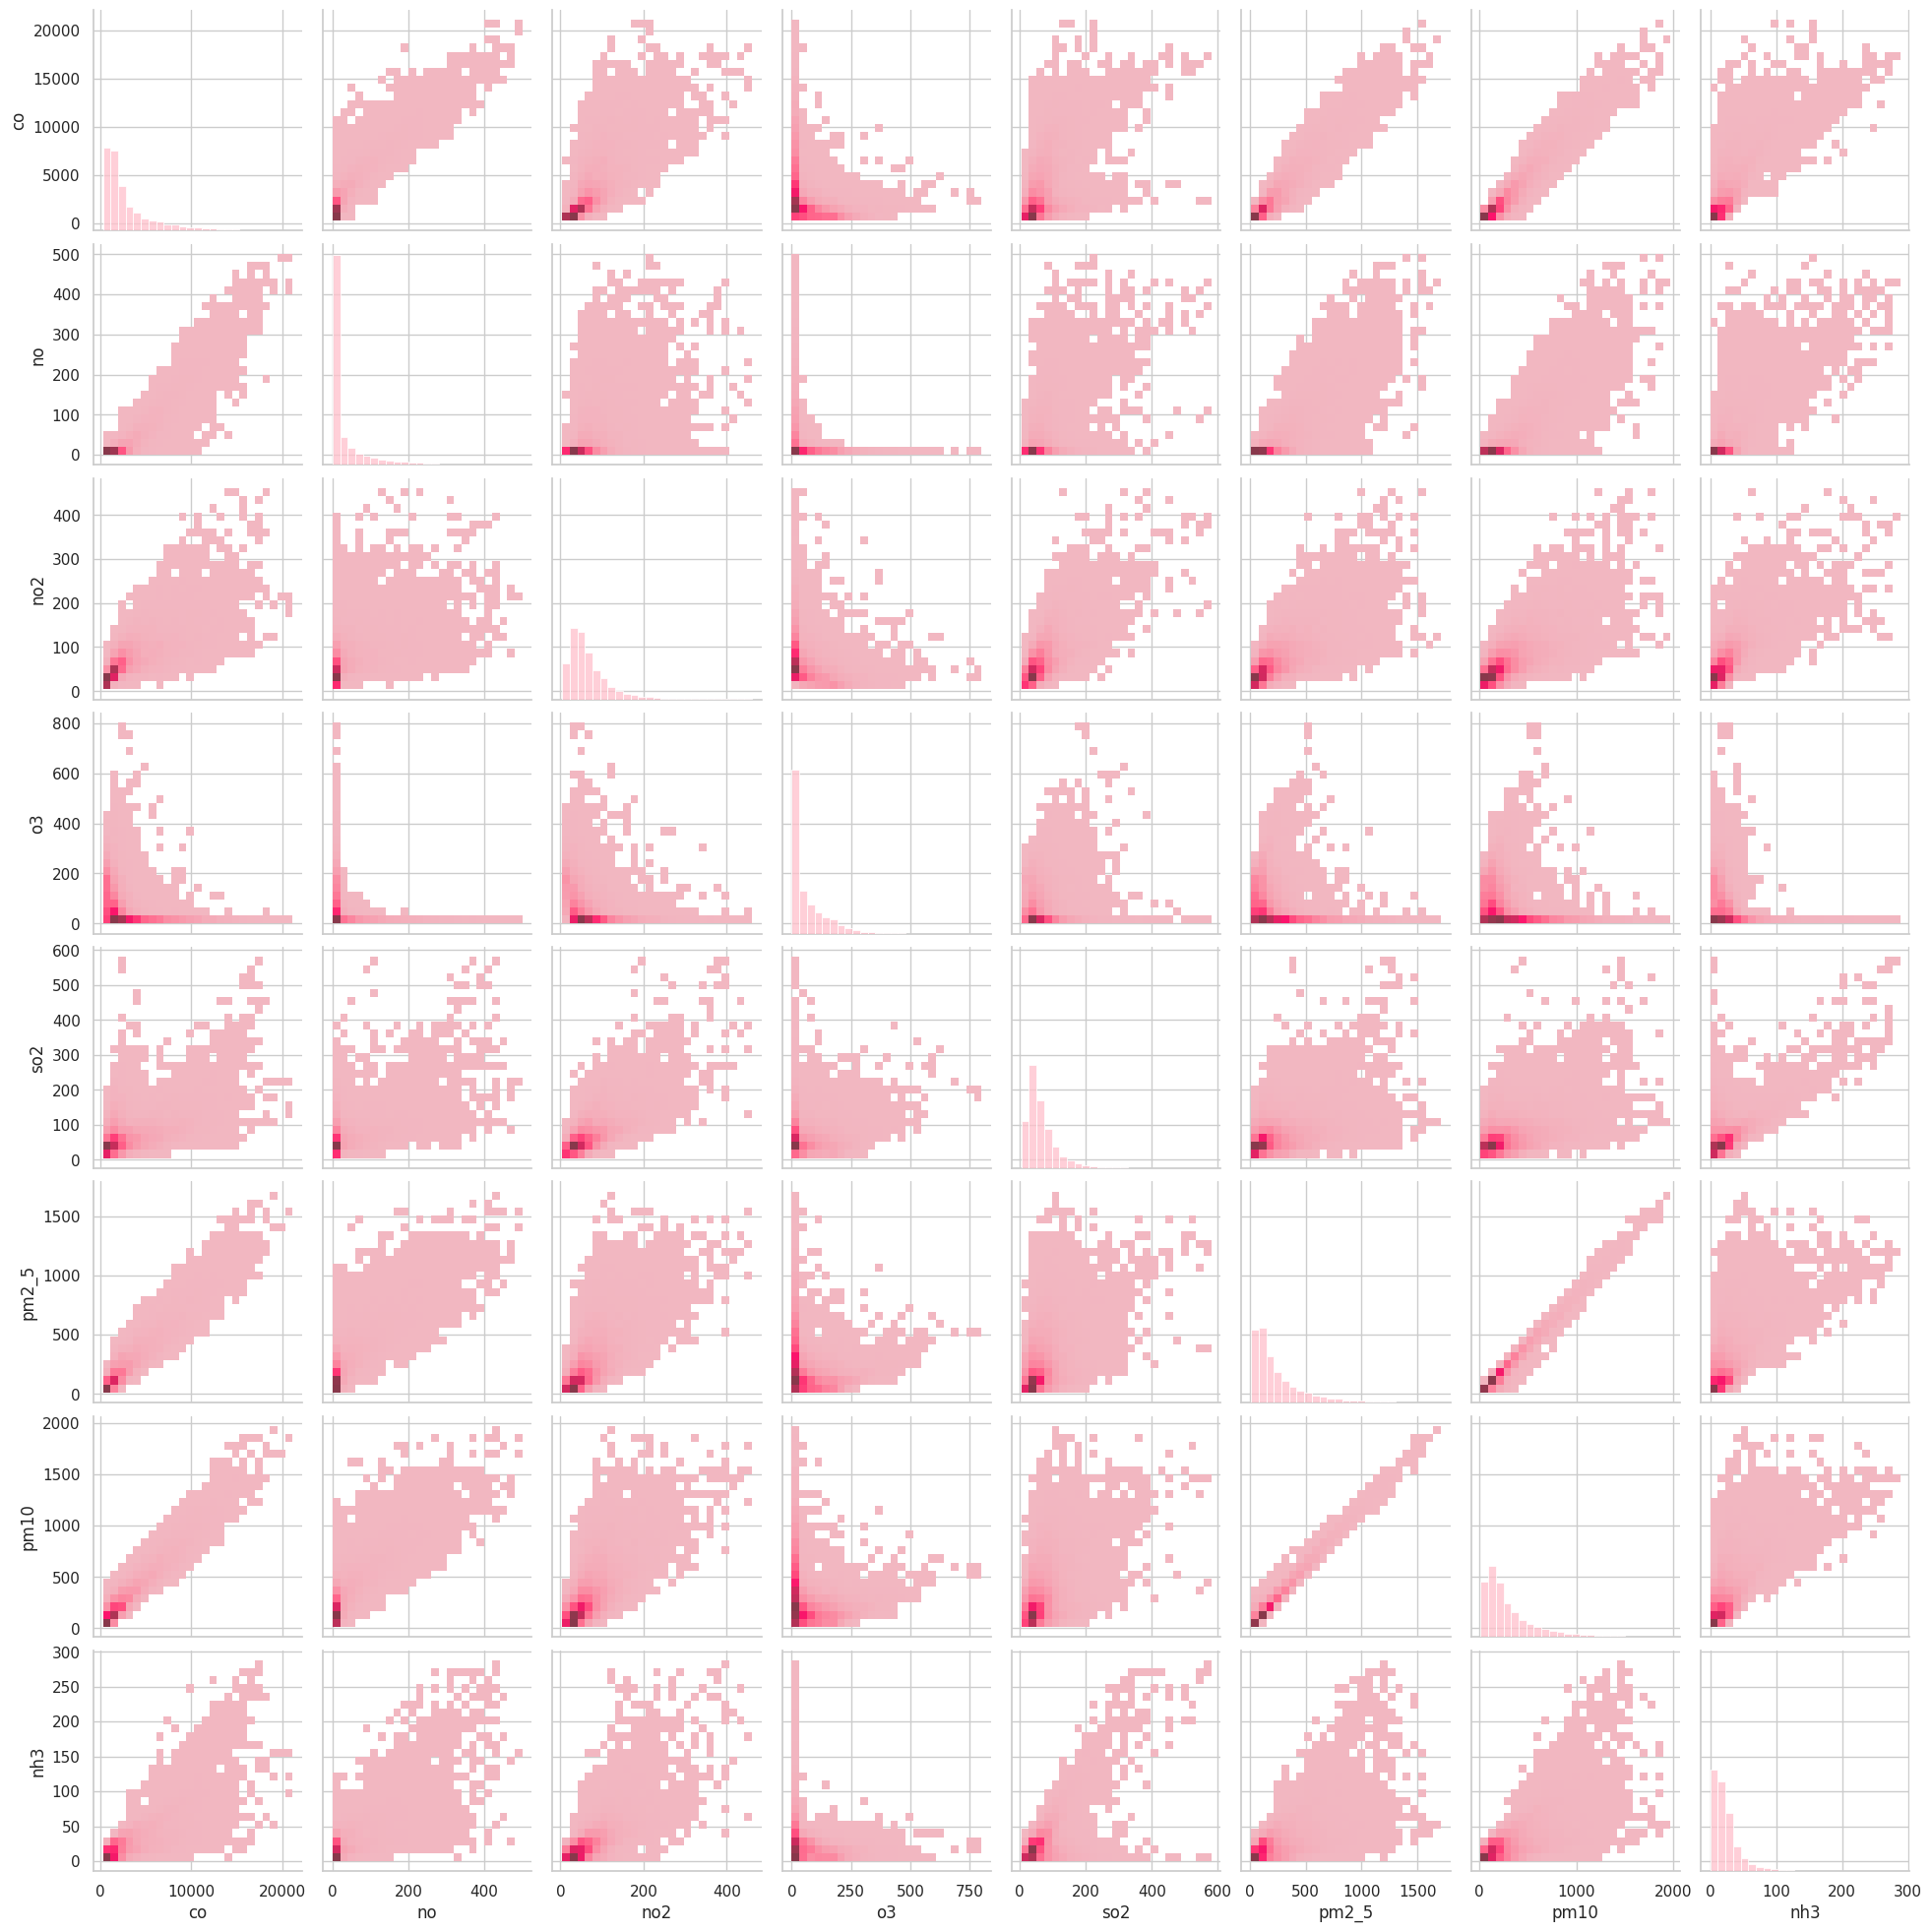

In [58]:
sns.set(style="whitegrid",palette="pink") #computed pairplots to show visually the correlation between each pollutant.
sns.pairplot(df,kind="hist",plot_kws={"color":"pink","bins":25},diag_kws={"color":"pink","bins":25})
plt.show()

**linear regression**

In [59]:
X=sm.add_constant(df["pm10"]) #performs linear regression model and adds intercept to the computation.
y=df["pm2_5"]

mod=sm.OLS(y,X).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                  pm2_5   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                 8.625e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:00:58   Log-Likelihood:                -92328.
No. Observations:               18776   AIC:                         1.847e+05
Df Residuals:                   18774   BIC:                         1.847e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -13.5978      0.363    -37.470      0.0

In [60]:
predictors=["pm2_5"] #assigned pollutant pm2.5 as predictor.
outcome="pm10" #assigned pm10 as outcome.
model=LinearRegression()
model.fit(df[predictors],df[outcome])
print(f"Intercept of pm2_5 and pm10: {model.intercept_:.3f}") #computed regression intercept.
print(f"Coefficient pm2_5 and pm10: {model.coef_[0]:.3f}") #computed regression coefficient.

Intercept of pm2_5 and pm10: 22.258
Coefficient pm2_5 and pm10: 1.167


In [61]:
fitted=model.predict(df[predictors]) #predicted the pm10 values
residuals=df[outcome]-fitted #computed residuals.
print(residuals.head())

0   -35.931267
1   -27.196793
2   -21.299718
3   -18.900778
4   -15.928654
Name: pm10, dtype: float64


In [62]:
RMSE=np.sqrt(mean_squared_error(df[outcome],fitted)) #computed root mean squared value.
print(f"Root mean squared error of pm2_5 and pm10: {RMSE:.2f}")

Root mean squared error of pm2_5 and pm10: 38.99


In [63]:
r2=r2_score(df[outcome],fitted) #computed root squared value.
print(f"r2 #1: {r2:.4f}")

r2 #1: 0.9787


In [64]:
metrics = {"Metric": ['R-squared', 'RMSE',"Model intercept","Model coefficient"],"Value":
 [r2, RMSE,model.intercept_,model.coef_[0]]} #computed a statistics table summarizing the main findings from the regression model.

sign_metrics=pd.DataFrame(metrics)

print(sign_metrics)

              Metric      Value
0          R-squared   0.978697
1               RMSE  38.993602
2    Model intercept  22.257965
3  Model coefficient   1.166735


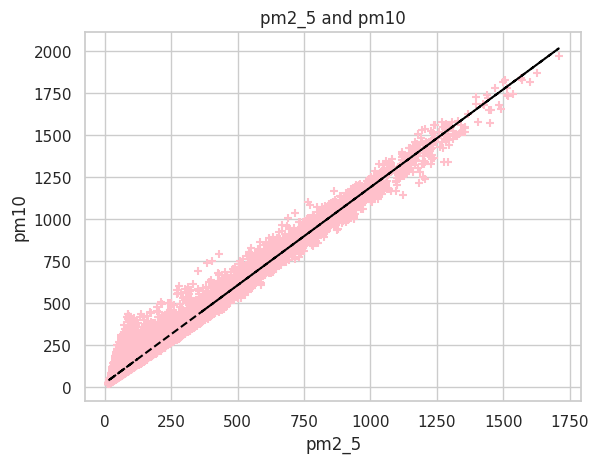

In [65]:
plt.scatter(df["pm2_5"],df["pm10"],color='pink',marker='+') #plotted the pm10 agaisnt pm2.5.
plt.plot(df["pm2_5"], model.intercept_+model.coef_*df["pm2_5"],color='black',linestyle="dashed")
plt.title('pm2_5 and pm10')
plt.xlabel('pm2_5')
plt.ylabel('pm10')
plt.grid(False)
plt.grid()
plt.show()

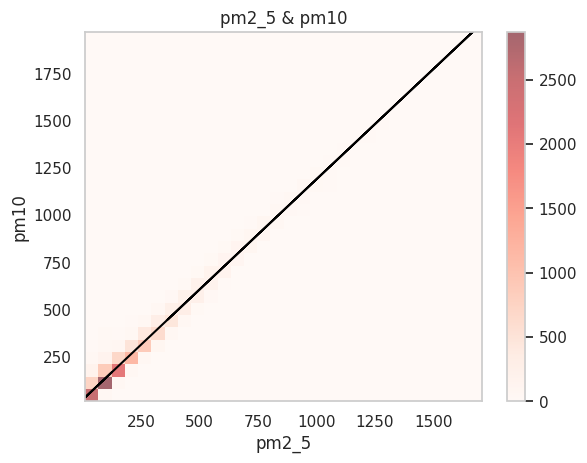

In [66]:
plt.hist2d(df["pm2_5"],df["pm10"],bins=30,cmap="Reds", alpha=0.6) #plotted a 2d histogram plot
plt.colorbar()
plt.plot(df["pm2_5"], model.intercept_+model.coef_*df["pm2_5"],color='black')
plt.title("pm2_5 & pm10")
plt.xlabel("pm2_5")
plt.ylabel("pm10")
plt.grid(False)
plt.show()

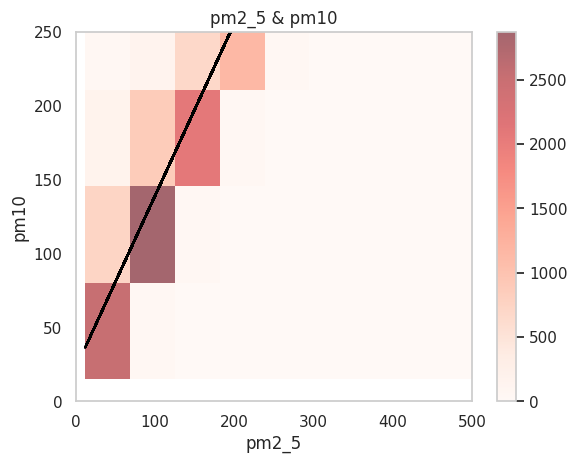

In [67]:
plt.hist2d(df["pm2_5"],df["pm10"],bins=30,cmap="Reds", alpha=0.6)
plt.colorbar()
plt.plot(df["pm2_5"], model.intercept_+model.coef_*df["pm2_5"],color='black')
plt.title("pm2_5 & pm10")
plt.xlabel("pm2_5")
plt.ylabel("pm10")
plt.xlim(0, 500) #to zoom in the plot, couldnt see it clearly before
plt.ylim(0, 250)
plt.grid(False)
plt.show()

**Multiple linear regression (backwards elimination)**

In [68]:
X=df[["nh3","no","no2","so2","pm2_5","pm10","o3"]] #computed all of the pollutants as predictors and assgined them to a variable.
y = df["co"] #selected CO as my outcome, since it shared the highest correlation with the other pollutants.
X=sm2.add_constant(X)
est=sm2.OLS(y, X).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     co   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.982
Method:                 Least Squares   F-statistic:                 1.461e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:00:59   Log-Likelihood:            -1.3833e+05
No. Observations:               18776   AIC:                         2.767e+05
Df Residuals:                   18768   BIC:                         2.767e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        249.5806      6.279     39.750      0.000     237.274     261.888
nh3           10.1942      0.202     50.351      0.000       9.797      10.591
no            18.3717      0.101    181.424      0.000      18.173      18.570
no2           13.1684      0.128    103.158      0.000      12.918      13.419
so2           -5.5642      0.098    -56.931      0.000      -5.756      -5.373
pm2_5          1.6229      0.092     17.685      0.000       1.443       1.803
pm10           3.2663      0.082     40.051      0.000       3.106       3.426
o3            -1.0327      0.044    -23.595      0.000      -1.118      -0.947
==============================================================================
Omnibus:                     2347.249   Durbin-Watson:                   0.133
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16951.890
Skew:                           0.378   Prob(JB):                         0.00
Kurtosis:                       7.593   Cond. No.                     1.20e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [80]:
predictors=["nh3","no","no2","so2","pm2_5","pm10","o3"] #computed the multiple linear regrassion without using the other model.
outcome='co'
modelM=LinearRegression()
modelM.fit(df[predictors],df[outcome])
print(f'Intercept: {model.intercept_:.3f}') #computed regression intercept.
print('Coefficients:')
for name, coef in zip(predictors,modelM.coef_): ##computed regression coefficients.
    print(f' {name}: {coef:.3f}')

Intercept: 22.258
Coefficients:
 nh3: 10.194
 no: 18.372
 no2: 13.168
 so2: -5.564
 pm2_5: 1.623
 pm10: 3.266
 o3: -1.033


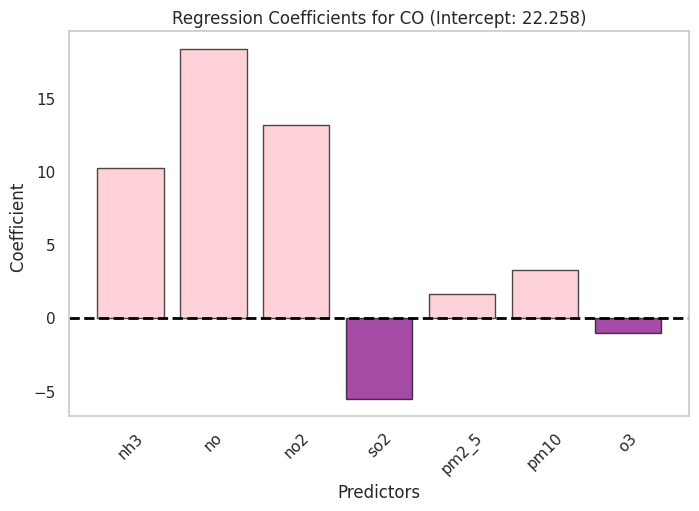

In [81]:
predictors = ["nh3","no","no2","so2","pm2_5","pm10","o3"] #computed a barplot to visualise the regression coefficients.
coef_values=modelM.coef_
colors=["pink" if coef > 0 else "purple" for coef in coef_values]

plt.figure(figsize=(8, 5))
plt.bar(predictors,coef_values,color=colors,alpha=0.7,edgecolor="black")
plt.axhline(y=0,color="black",linestyle="dashed",linewidth=2)
plt.title(f"Regression Coefficients for CO (Intercept: {model.intercept_:.3f})")
plt.xlabel("Predictors")
plt.ylabel("Coefficient ")
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [83]:
predictors_dropped=[p for p in predictors if p not in ["o3", "so2"]] #dropped poluutants with a negative regression coefficient to have an all positive reegression model.
X_dropped=df[predictors_dropped]
X_dropped=sm.add_constant(X_dropped)
est_dropped=sm.OLS(y, X_dropped).fit()
print(est_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.976
Model:                            OLS   Adj. R-squared:                  0.976
Method:                 Least Squares   F-statistic:                 1.503e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:12:07   Log-Likelihood:            -1.4116e+05
No. Observations:               18776   AIC:                         2.823e+05
Df Residuals:                   18770   BIC:                         2.824e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.4469      6.081      2.211      0.0

In [85]:
predictors_dropped_std = [p for p in predictors_dropped if p not in ["pm2_5","nh3"]] #dropped the pollutants with the lowest t-statistic
X_dropped_std = df[predictors_dropped_std]
X_dropped_std = sm.add_constant(X_dropped_std)
est_dropped = sm.OLS(y, X_dropped_std).fit()
print(est_dropped.summary())

                            OLS Regression Results                            
Dep. Variable:                     co   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                 2.381e+05
Date:                Tue, 08 Apr 2025   Prob (F-statistic):               0.00
Time:                        23:12:36   Log-Likelihood:            -1.4163e+05
No. Observations:               18776   AIC:                         2.833e+05
Df Residuals:                   18772   BIC:                         2.833e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.7008      6.066      3.907      0.0

In [86]:
fitted3=est_dropped.predict(X_dropped_std) #plotted residuals for the final pollutants.
residuals3=y-fitted3
print(residuals3.head())

0   -287.409528
1   -267.499601
2   -337.441593
3   -397.269345
4   -460.511254
dtype: float64


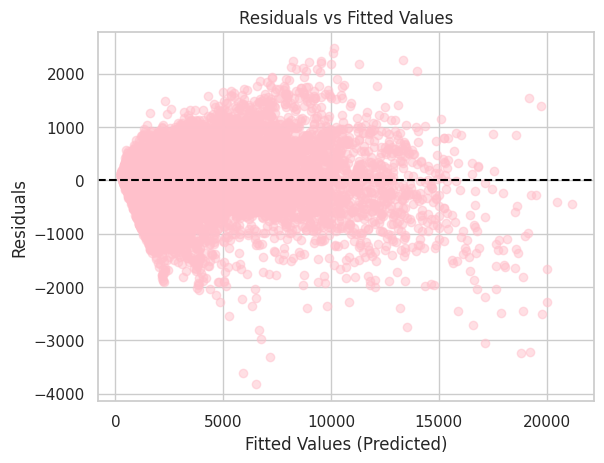

In [87]:
plt.scatter(fitted3, residuals3, color="pink", alpha=0.5) #plotted a scatter plot of the residuals against the fitted values.
plt.axhline(y=0, color="black", linestyle="--")
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values (Predicted)")
plt.ylabel("Residuals")
plt.show()